# Electric Vehicles Market Size Analysis


Market Size Analysis is the process of estimating the potential sales for a product or service within a particular market segment. In the context of electric vehicles (EVs), it involves assessing the total volume of EV registrations to understand the growth of the market, forecast future trends, and help stakeholders make informed decisions regarding production, infrastructure development, and policy-making.

The provided dataset contains the following columns, each representing different aspects of the electric vehicle (EV) population in the United States:
- **VIN (1-10):** Partial Vehicle Identification Number.
- **County:** The county in which the vehicle is registered.
- **City:** The city in which the vehicle is registered.
- **State:** The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state.
- **Postal Code:** The postal code where the vehicle is registered.
- **Model Year:** The year of the vehicle model.
- **Make:** The manufacturer of the vehicle.
- **Model:** The model of the vehicle.
- **Electric Vehicle Type:** The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).
- **Clean Alternative Fuel Vehicle (CAFV) Eligibility:** Eligibility status for clean alternative fuel vehicle programs.
- **Electric Range:** The maximum range of the vehicle on a single charge (in miles).
- **Base MSRP:** The Manufacturer’s Suggested Retail Price.
- **Legislative District:** The legislative district where the vehicle is registered.
- **DOL Vehicle ID:** Department of Licensing Vehicle Identification.
- **Vehicle Location:** Geographic coordinates of the vehicle location.
- **Electric Utility:** The electric utility service provider for the vehicle’s location.
- **2020 Census Tract:** The census tract for the vehicle’s location.

The primary objective of this analysis is to leverage historical EV registration data to understand the current market penetration of EVs, predict future market growth, and identify key trends and factors driving market expansion. The specific goals include:

1. Assess the historical growth trend of EV registrations.
2. Forecast future EV registrations based on historical trends.
3. Analyze the distribution of EV registrations across different models, makes, and geographical regions.
4. Estimate the market size and growth potential of the EV market for upcoming years.
5. Provide insights to support stakeholders in decision-making processes related to production, infrastructure planning, and policy formulation.

Now, let’s get started with the task of electric vehicles market size analysis by importing the necessary Python libraries

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the dataset

ev_df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
ev_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


So, this data is based on the EV population in the United States. Now, let’s clean the dataset before moving forward:

In [3]:
ev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [4]:
ev_df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [5]:
ev_df = ev_df.dropna()

For the task of market size of electric vehicles analysis, we can explore the following areas:

- **EV Adoption Over Time:** Analyze the growth of the EV population by model year.
- **Geographical Distribution:** Understand where EVs are most commonly registered (e.g., by county or city).
- **EV Types:** Breakdown of the dataset by electric vehicle type (BEV, etc.).
- **Make and Model Popularity:** Identify the most popular makes and models among the registered EVs.
- **Electric Range Analysis:** Analyze the electric range of vehicles to see how EV technology is progressing.
- **Estimated Growth in Market Size:** Analyze and find the estimated growth in the market size of electric vehicles.

Let’s start with analyzing the EV Adoption Over Time by visualizing the number of EVs registered by model year. It will give us an insight into how the EV population has grown over the years:

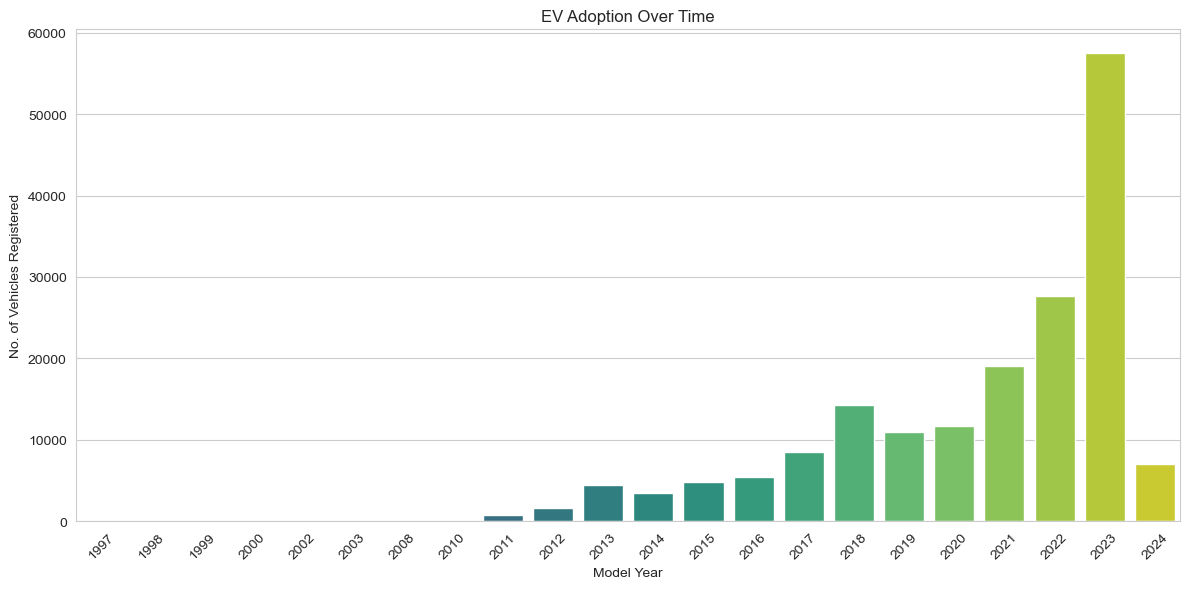

In [6]:
# plotting bar chart for visualizing Ev Adoption Over Time
sns.set_style("whitegrid")
plt.figure(figsize = (12,6))
# Ev adoption over time
ev_adoption_by_year = ev_df['Model Year'].value_counts().sort_index()
sns.barplot(x = ev_adoption_by_year.index, y = ev_adoption_by_year.values, palette = "viridis")
plt.title("EV Adoption Over Time")
plt.xlabel("Model Year")
plt.ylabel("No. of Vehicles Registered")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

From the above bar chart, it’s clear that EV adoption has been increasing over time, especially noting a significant upward trend starting around 2016. The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2017 onwards. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.

Now, let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:

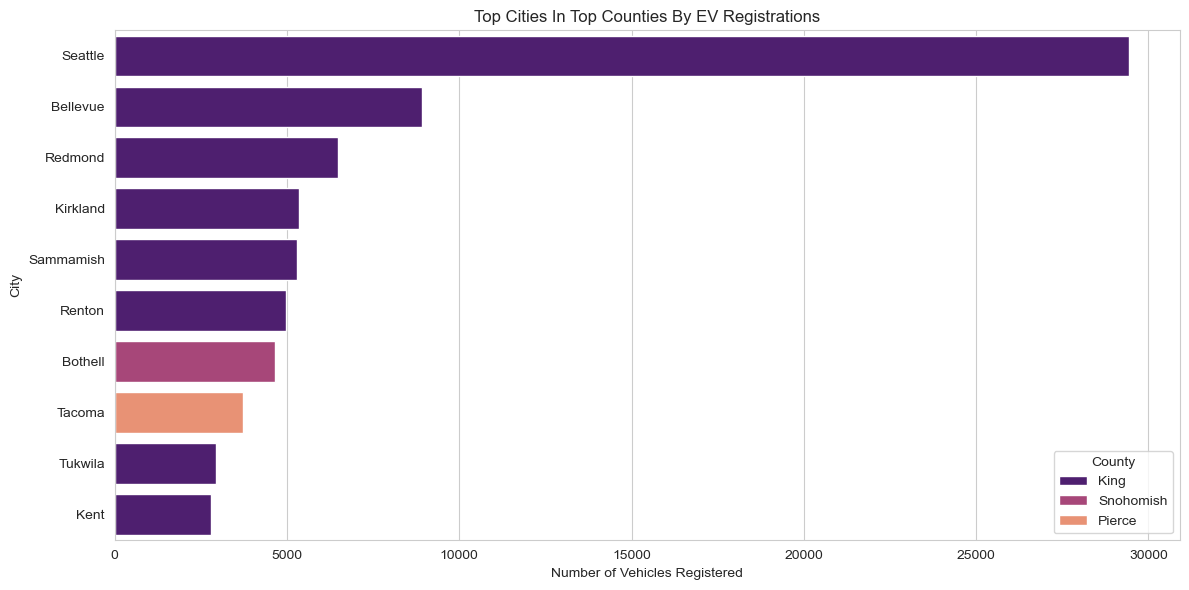

In [7]:
# geographical distribution at county level
ev_county_dist = ev_df["County"].value_counts()
top_counties = ev_county_dist.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_df[ev_df['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_dist_in_top_counties = top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name = "No. of Vehicles")

# visualize the top 10 cities across these counties
top_cities = ev_city_dist_in_top_counties.head(10)

plt.figure(figsize = (12,6))
sns.barplot(data = top_cities, x = 'No. of Vehicles', y = 'City', hue = 'County', dodge = False, palette = 'magma')
plt.title("Top Cities In Top Counties By EV Registrations")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("City")
plt.legend(title = "County")
plt.tight_layout()
plt.show()

The above graph compares the number of electric vehicles registered in various cities within three counties: King, Snohomish, and Pierce. The horizontal bars represent cities, and their length corresponds to the number of vehicles registered, colour-coded by county. Here are the key findings from the above graph:

- Seattle, which is in King County, has the highest number of EV registrations by a significant margin, far outpacing the other cities listed.
- Bellevue, Redmond, Kirkland, Sammamish and Renton, also in King County, following Seattle with the next highest registrations, though these are considerably less than Seattle’s.
- Bothell from Snohomish county and Tacoma from pierce county, showing moderate EV registrations.
- The majority of cities shown are from King County, which seems to dominate EV registrations among the three counties.
- Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King County.

Next, let’s explore the types of electric vehicles represented in this dataset. Understanding the breakdown between different EV types, such as Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV), can provide insights into consumer preferences and the adoption patterns of purely electric vs. hybrid electric solutions. So, let’s visualize the distribution of electric vehicle types to see which categories are most popular among the registered vehicles:

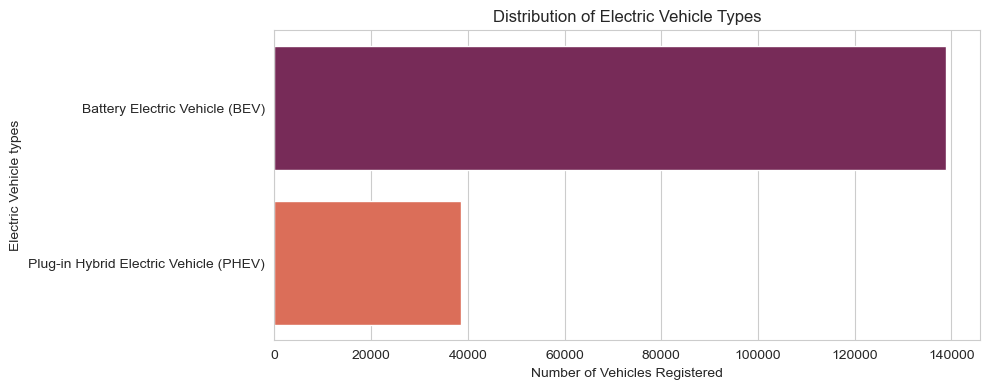

In [8]:
# distribution Of EVs by its types
ev_type_dist = ev_df['Electric Vehicle Type'].value_counts()

# visualize EV type distribution
plt.figure(figsize = (10,4))
sns.barplot(x = ev_type_dist.values, y = ev_type_dist.index, palette= "rocket")
plt.title("Distribution of Electric Vehicle Types")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("Electric Vehicle types")
plt.tight_layout()
plt.show()


The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.

Let’s now focus on the popularity of electric vehicle manufacturers and models among the registered vehicles. This analysis will help us identify which manufacturers and specific models dominate the EV market, potentially indicating consumer preferences, brand loyalty, and the success of various manufacturers’ strategies in promoting electric mobility.

So, let’s have a look at the most popular manufacturers and then drill down into the most popular models within those manufacturers:

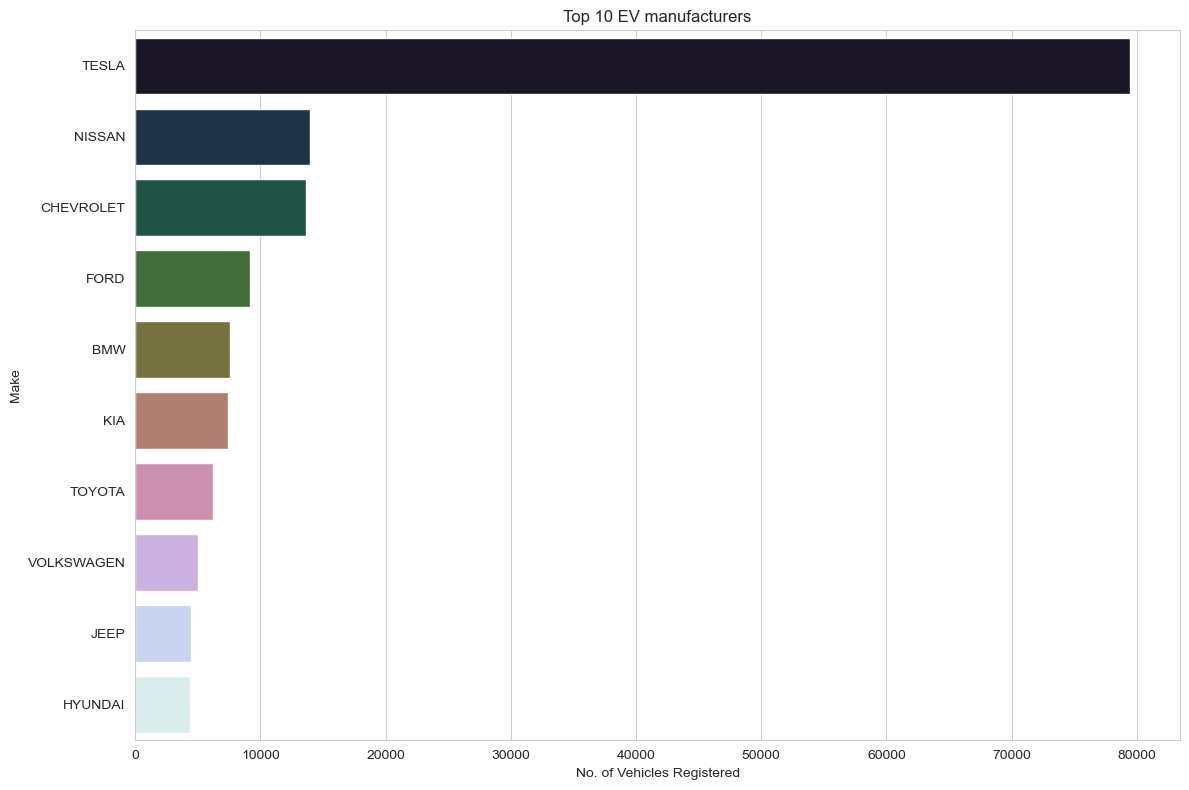

In [9]:
# analyzing the popularity of EV manufacturers
ev_make_dist = ev_df['Make'].value_counts().head(10)

# visualizing the distribution of EV manufacturers
plt.figure(figsize=(12,8))
sns.barplot(x = ev_make_dist.values, y = ev_make_dist.index, palette='cubehelix')
plt.title("Top 10 EV manufacturers")
plt.xlabel("No. of Vehicles Registered")
plt.ylabel("Make")
plt.tight_layout()
plt.show()

The above chart shows that:

- TESLA leads by a substantial margin with the highest number of vehicles registered.
- NISSAN is the second most popular manufacturer, followed by CHEVROLET, though both have significantly fewer registrations than TESLA.
- FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI follow in decreasing order of the number of registered vehicles.

Next, let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level:

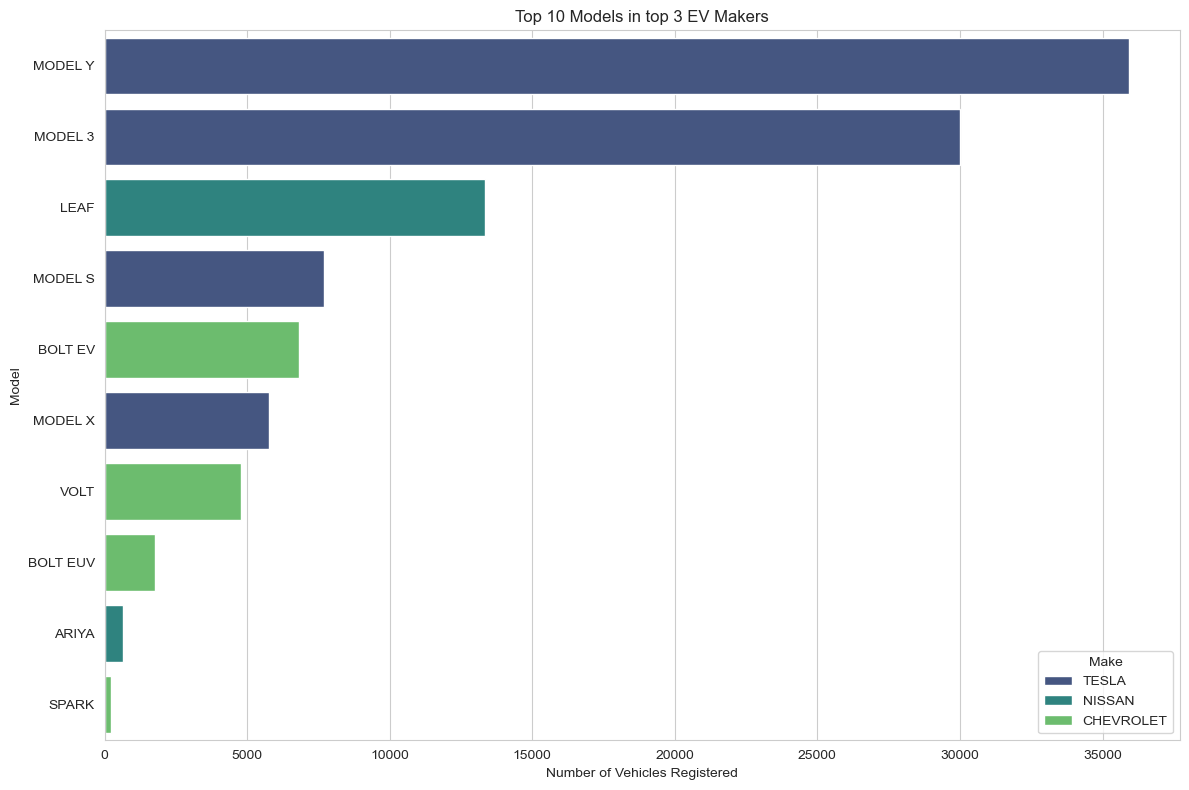

In [10]:
# selecting top 3 manufacturers based on No. of Vehicles registered
top_3_makes = ev_make_dist.head(3).index

# filtering dataset for these top makers
top_makers_data = ev_df[ev_df['Make'].isin(top_3_makes)]

# analyzing popularity of EV models among these top 3 makers
ev_model_dist_in_top_makes = top_makers_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name = "No. of Vehicles")

# visualizing top 10 models across these makers
top_models = ev_model_dist_in_top_makes.head(10)

plt.figure(figsize = (12,8))
sns.barplot(data = top_models, x = "No. of Vehicles", y = "Model", hue = "Make", dodge = False, palette="viridis")
plt.title("Top 10 Models in top 3 EV Makers")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("Model")
plt.legend(title="Make")
plt.tight_layout()
plt.show()

The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: TESLA, NISSAN, and CHEVROLET. Here are the findings:

- TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.
- NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.
- TESLA’s MODEL S and MODEL X also have a significant number of registrations.
- CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.
- NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.

Next, we’ll explore the electric range of vehicles, which is a critical factor for analyzing the market size of electric vehicles. The electric range indicates how far an EV can travel on a single charge, and advancements in battery technology have been steadily increasing these ranges over the years. So, let’s look at the distribution of electric ranges in the dataset and identify any notable trends, such as improvements over time or variations between different vehicle types or manufacturers:

C:\Users\91787\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


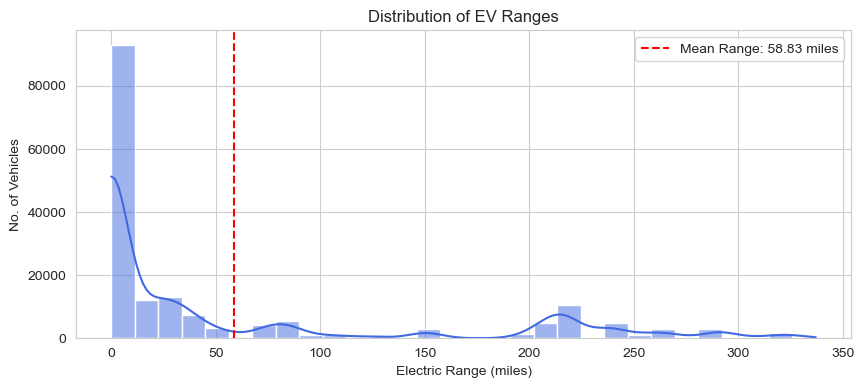

In [15]:
# analyzing the distribution of electric ranges

plt.figure(figsize = (10,4))
sns.histplot(ev_df['Electric Range'], bins = 30, kde = True, color = 'royalblue')
plt.title("Distribution of EV Ranges")
plt.xlabel("Electric Range (miles)")
plt.ylabel("No. of Vehicles")
plt.axvline(ev_df['Electric Range'].mean(), color = 'red', linestyle = '--', label = f'Mean Range: {ev_df["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

The above graph shows the mean electric range. Key observations from the graph include:

- There is a high frequency of vehicles with a low electric range, with a significant peak occurring just before 50 miles.
- The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent.
- The mean electric range for this set of vehicles is marked at approximately 58.84 miles, which is relatively low compared to the highest ranges shown in the graph.
- Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.

It suggests that while there are EVs available with high electric ranges, the average range is skewed lower due to a substantial number of vehicles with shorter ranges.

Now, let’s delve into the trend of electric ranges over model years, which can provide insights into how advancements in battery technology and vehicle design have influenced the electric range capabilities of electric vehicles over time. A positive trend in this analysis would indicate continuous improvements, offering consumers EVs with longer driving ranges and potentially addressing one of the major concerns regarding the EV market (range anxiety):

C:\Users\91787\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91787\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


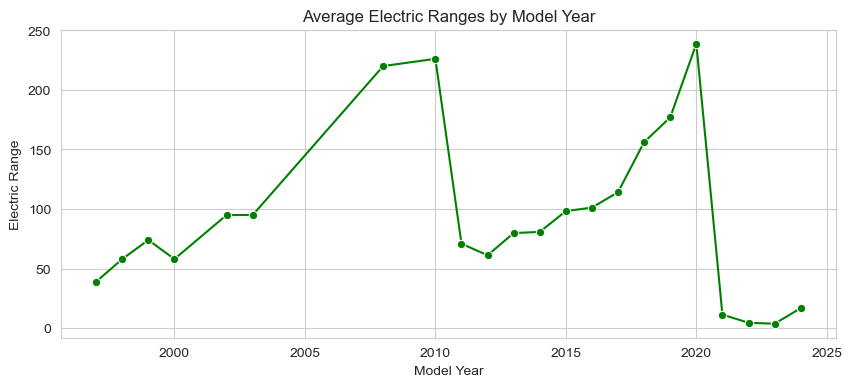

In [16]:
# calculating average electric range by model year

avg_range_by_model_year = ev_df.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize = (10,4))
sns.lineplot(x = "Model Year", y = "Electric Range", data = avg_range_by_model_year, marker = 'o', color = 'green')
plt.title("Average Electric Ranges by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Electric Range")
plt.show()

The above graph shows the progression of the average electric range of vehicles from around the year 1997 to 2024. Key findings from the graph:

- There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
- There is a noticeable peak around the year 2020 when the average range reaches its highest point.
- Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.

The data suggest that while there have been fluctuations, the overall trend over the last two decades has been toward increasing the electric range of EVs.

Next, let’s explore how electric ranges vary among the top manufacturers and models. This analysis can reveal how different manufacturers are addressing the crucial aspect of electric range and highlight which models stand out for their superior range capabilities:



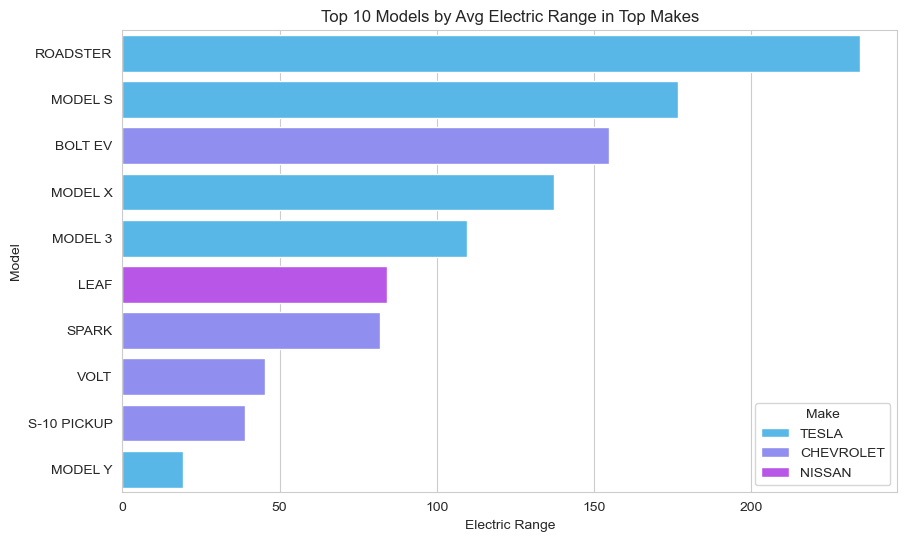

In [24]:
# analyzing top models by average electric ranges

avg_range_by_model = top_makers_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending = False).reset_index()

# top 10 model by highest electric ranges
top_range_models = avg_range_by_model.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x = 'Electric Range', y = 'Model', hue = 'Make', dodge = False, data = top_range_models, palette='cool')
plt.title("Top 10 Models by Avg Electric Range in Top Makes")
plt.xlabel("Electric Range")
plt.ylabel('Model')
plt.legend(title = 'Make', loc = 'lower right')
plt.show()

The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.

### Estimated Market Size Analysis of Electric Vehicles in the United States

Now, let’s move forward towards finding the estimated market size of electric vehicles in the United States. I’ll first count the number of EVs registered every year:

In [26]:
# calculate the number of EVs registered each year
ev_registrations_count = ev_df['Model Year'].value_counts().sort_index()
ev_registrations_count

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary of EV registrations for recent years:

- In 2021, there were 19,063 EVs registered.
- In 2022, the number increased to 27708 EVs.
- In 2023, a significant jump to 57,519 EVs was observed.
- For 2024, currently, 7,072 EVs are registered, which suggests partial data.

To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years.

We’ll calculate the Compound Annual Growth Rate (CAGR) between a recent year with complete data (2023) and an earlier year to project the 2024 figures. Additionally, using this growth rate, we can estimate the market size for the next five years. Let’s proceed with these calculations:

In [38]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registrations_count[ev_registrations_count.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


#### Now, let’s plot the estimated market size data:

In [39]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029+1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029+1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

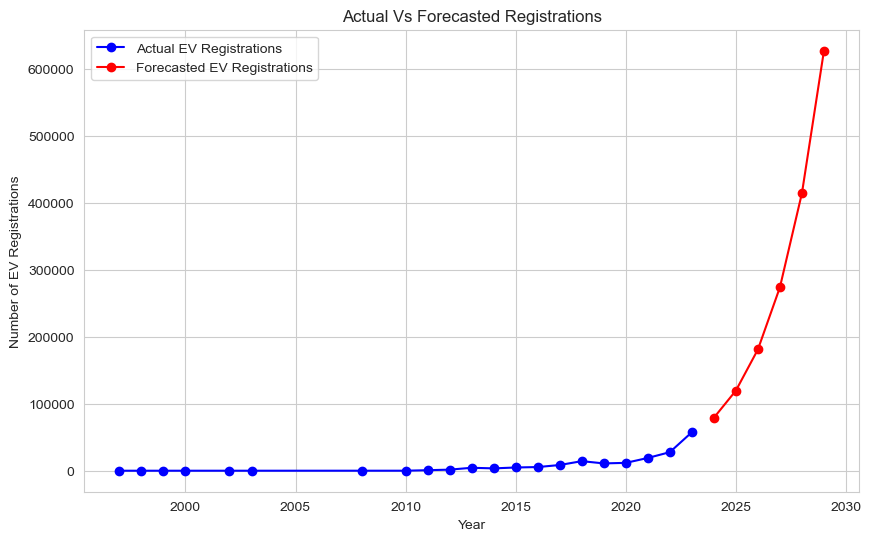

In [40]:
# plotting data
plt.figure(figsize = (10,6))
plt.plot(actual_years, actual_values, 'bo-', label = "Actual EV Registrations")
plt.plot(forecast_years_full, forecasted_values_full, 'ro-', label = "Forecasted EV Registrations")

plt.title('Actual Vs Forecasted Registrations')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

From the above graph, we can see:
- The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.
- The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.

Given the growing trend in actual EV registrations and the projected acceleration as per the forecast data, we can conclude that the EV market size is expected to expand considerably. The steep increase in forecasted registrations suggests that consumer adoption of EVs is on the rise, and this trend is likely to continue. Overall, the data point towards a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.